## Imports used in this notebook
Most libraries available through Anaconda 3.8


In [1]:
import sys
# Put the path to distill here
sys.path.append('..\..\incubator-flagon-distill')

import distill
from helpers import *

## Defining Helper Functions
The `filter_func_clicks` and `filter_func_clicks_mouseover` functions, allow us to pass in our log and filter based on log type. For example, if we want to only read `click` type logs, we only pass in `['click']` or if we want both `mouseover` and `click` type logs, we pass in `['click', 'mouseover']`.

In [2]:
def filter_func_clicks(log):
    return log['logType'] == 'raw' and log['type'] in ['click']
def filter_func_clicks_mouseover(log):
    return log['logType'] == 'raw' and log['type'] in ['click', 'mouseover']

The `get_partition` function, allow us to pass in our log file and the elements, then create our partition of the logs. 
For example, if we want to go through our logs and check if elements are 'Map', 'Side Panel', or other; we can pass them into this function.

In [3]:
def get_partition(log, partition_elements):
    partition = list(set(log['path']) & set(partition_elements))
    if len(partition) == 1:
        return partition[0]
    if len(partition) == 0:
        return "Other"
    print("uh oh")
    return "uh oh"

## Defining Files & Generating Visuals + Metrics


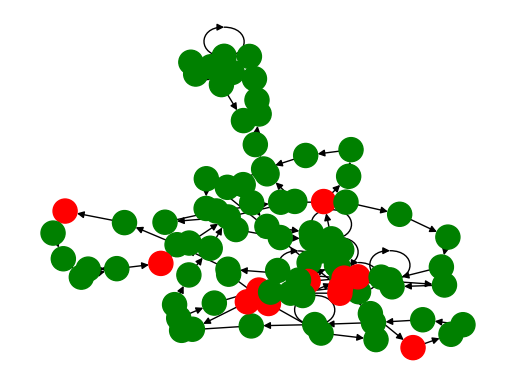

In [7]:
# Path to the logs
files = ["./data/superset_example.json"]

# Color coding the different elements for the Sankey and Directed graphs
color_dict = {'Other':'green', 'div.header-controls':'red'}

# creating a list to store the generated directed graphs
graphs = []

# Going through each log file indivudually
for file in files:
    # Create a dictionary of all 'click' type logs
    log_dict_clicks = setup(file, "datetime", filter_func_clicks)
    # Create a dictionary of all 'click' & 'mousover' type logs
    log_dict_clicks_mouseover = setup(file, "datetime", filter_func_clicks_mouseover)
    
    # creating the directed graph and assigning the previously defined color-code
    (graph, colors) = get_color_graph(log_dict_clicks, color_dict, get_partition)
    f = plt.figure()
    # drawing the di-graph
    nx.draw(graph, pos=nx.spring_layout(graph), node_color=colors, ax=f.add_subplot(111))
    # adding the digraph to our previously defined 'graphs' list.
    graphs.append(graph)


